In [ ]:
''''Assignment #5
Rezwan-Ul-Alam (ID: 2011659042)
Md. Nur Alam Jowel (ID: 2012355042)
Raian Ruku (ID: 2013409642)'''

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/data/DT-BrainCancer.csv')
df.head()

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1


# Data Visualization & Preprocessing

In [5]:
print("Shape of the Data: ", df.shape )

Shape of the Data:  (88, 7)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     int64  
 5   gtv         88 non-null     float64
 6   status      88 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ KB


In [7]:
df['ki'] = df['ki'].astype('float64')
df['status'] = df['status'].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     float64
 5   gtv         88 non-null     float64
 6   status      88 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.9+ KB


In [9]:
df.drop(df.columns[0], axis=1, inplace=True)

In [10]:
df.head()

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90.0,6.11,0.0
1,Male,HG glioma,Supratentorial,90.0,19.35,1.0
2,Female,Meningioma,Infratentorial,70.0,7.95,0.0
3,Female,LG glioma,Supratentorial,80.0,7.61,1.0
4,Male,HG glioma,Supratentorial,90.0,5.06,1.0


In [11]:
for column in df.columns:
    total = df[column].isnull().sum()
    print(f"Column '{column}' has {total} null values")
    print("\n")

Column 'sex' has 0 null values


Column 'diagnosis' has 1 null values


Column 'loc' has 0 null values


Column 'ki' has 0 null values


Column 'gtv' has 0 null values


Column 'status' has 0 null values




In [12]:
df.dropna(subset=['diagnosis'], inplace=True)
print("Number of null values in 'diagnosis' column after dropping:", df['diagnosis'].isnull().sum())

Number of null values in 'diagnosis' column after dropping: 0


In [13]:
print(df['loc'].value_counts())
print(df['sex'].value_counts())
print(df['diagnosis'].value_counts())

loc
Supratentorial    68
Infratentorial    19
Name: count, dtype: int64
sex
Female    45
Male      42
Name: count, dtype: int64
diagnosis
Meningioma    42
HG glioma     22
Other         14
LG glioma      9
Name: count, dtype: int64


# Label Encoding & One Hot Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_enc=LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])
df['loc'] = label_enc.fit_transform(df['loc'])
df['diagnosis'] = label_enc.fit_transform(df['diagnosis'])

In [ ]:
'''one_hot_enc = OneHotEncoder(sparse_output=False, drop='first')
diagnosis_encoded = one_hot_enc.fit_transform(df[['diagnosis']])
diagnosis_categories = one_hot_enc.categories_[0]
diagnosis_columns = [f'diagnosis_{category}' for category in diagnosis_categories[1:]]
diagnosis_df = pd.DataFrame(diagnosis_encoded, columns=diagnosis_columns)
df = pd.concat([df, diagnosis_df], axis=1)'''

In [ ]:
#df.dropna(inplace = True)

In [ ]:
'''for column in df.columns:
    total = df[column].isnull().sum()
    print(f"Column '{column}' has {total} null values")
    print("\n")'''

In [15]:
df.head()

,sex,diagnosis,loc,ki,gtv,status
0,0,2,0,90.0,6.11,0.0
1,1,0,1,90.0,19.35,1.0
2,0,2,0,70.0,7.95,0.0
3,0,1,1,80.0,7.61,1.0
4,1,0,1,90.0,5.06,1.0


In [ ]:
#df.reset_index(drop=True, inplace=True)

In [ ]:
#df = df[['sex', 'diagnosis', 'loc', 'ki', 'gtv', 'diagnosis_LG glioma', 'diagnosis_Meningioma', 'diagnosis_Other', 'status']]


In [ ]:
#df.drop('diagnosis', axis=1, inplace=True)
#df.head()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 87
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        87 non-null     int64  
 1   diagnosis  87 non-null     int64  
 2   loc        87 non-null     int64  
 3   ki         87 non-null     float64
 4   gtv        87 non-null     float64
 5   status     87 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 4.8 KB


In [17]:
df.shape

(87, 6)

# Data Split 70% 15% 15%

In [18]:
X = df.iloc[:,:5]
y = df.iloc[:, 5]

print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (87, 5)
Shape of y:  (87,)


In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of y_val: ", y_val.shape)
print("shape of y_test: ", y_test.shape)

Shape of X_train:  (60, 5)
Shape of X_val:  (13, 5)
Shape of X_test:  (14, 5)
Shape of y_train:  (60,)
shape of y_val:  (13,)
shape of y_test:  (14,)


# MinMax Scaler

In [20]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



# Evaluation matrics Functions

In [26]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [27]:
def calculate_precision(y_true, y_pred, label):
    true_positives = sum((y_true == label) & (y_pred == label))
    predicted_positives = sum(y_pred == label)
    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0
    return precision


In [28]:
def calculate_recall(y_true, y_pred, label):
    true_positives = sum((y_true == label) & (y_pred == label))
    actual_positives = sum(y_true == label)
    if actual_positives > 0:
      recall = true_positives / actual_positives
    else :0
    return recall

In [29]:
def calculate_f1_score(precision, recall):
    if (precision + recall) > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0
    return f1_score


In [33]:
def calculate_confusion_matrix(y_true, y_pred):
    unique_labels = sorted(set(y_true) | set(y_pred))
    num_labels = len(unique_labels)
    confusion_matrix = [[0] * num_labels for _ in range(num_labels)]

    label_to_index = {label: i for i, label in enumerate(unique_labels)}

    for true_label, pred_label in zip(y_true, y_pred):
        true_index = label_to_index[true_label]
        pred_index = label_to_index[pred_label]
        confusion_matrix[true_index][pred_index] += 1

    return confusion_matrix


# ZeroR Classifier

In [30]:
from sklearn.dummy import DummyClassifier

zeror_classifier = DummyClassifier(strategy="most_frequent")
zeror_classifier.fit(X_train_scaled, y_train)

#on train
y_train_pred_zeror= zeror_classifier.predict(X_train_scaled)
train_accuracy_zeror = calculate_accuracy(y_train, y_train_pred_zeror)
print("ZeroR Classifier Accuracy on training Set:", train_accuracy_zeror)

#on validation
y_val_pred_zeror= zeror_classifier.predict(X_val_scaled)
val_accuracy_zeror = calculate_accuracy(y_val, y_val_pred_zeror)
print("ZeroR Classifier Accuracy on Validation Set:", val_accuracy_zeror)

#on test
y_test_pred_zeror = zeror_classifier.predict(X_test_scaled)
test_accuracy_zeror = calculate_accuracy(y_test, y_test_pred_zeror)
print("ZeroR Classifier Accuracy on Test Set:", test_accuracy_zeror)


ZeroR Classifier Accuracy on training Set: 0.5666666666666667
ZeroR Classifier Accuracy on Validation Set: 0.6923076923076923
ZeroR Classifier Accuracy on Test Set: 0.6428571428571429


In [31]:
# Initialize empty lists to store Precision, Recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []
unique_labels = set(y_test) | set(y_test_pred_zeror)
for label in unique_labels:
    precision = calculate_precision(y_test, y_test_pred_zeror, label)
    recall = calculate_recall(y_test, y_test_pred_zeror, label)
    f1_score = calculate_f1_score(precision, recall)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
for i, label in enumerate(unique_labels):
    print(f"\tClass {label}")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1-score: {f1_scores[i]}")


	Class 0.0
Precision: 0.6428571428571429
Recall: 1.0
F1-score: 0.782608695652174
	Class 1.0
Precision: 0
Recall: 0.0
F1-score: 0


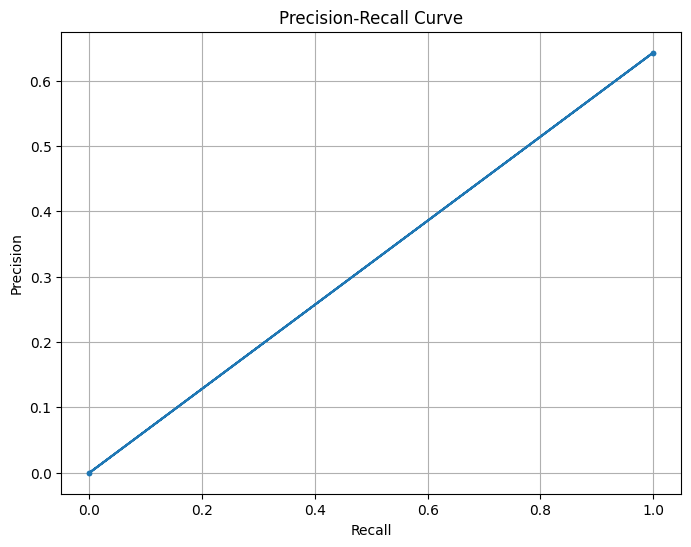

In [32]:

for label in unique_labels:
    true_positives = sum((y_test == label) & (y_test_pred_zeror == label))
    predicted_positives = sum(y_test_pred_zeror == label)
    actual_positives = sum(y_test == label)

    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0

    if actual_positives > 0:
        recall = true_positives / actual_positives
    else:
        recall = 0

    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [34]:
conf_matrix = calculate_confusion_matrix(y_test, y_test_pred_zeror)
print("ZeroR Confusion Matrix:")
for row in conf_matrix:
    print(row)

ZeroR Confusion Matrix:
[9, 0]
[5, 0]


# OneR classifier

In [35]:
from mlxtend.classifier import OneRClassifier
oner = OneRClassifier()
oner.fit(X_train_scaled, y_train);

In [36]:
#on train
y_train_pred_oner = oner.predict(X_train_scaled)
train_accuracy_oner = calculate_accuracy(y_train, y_train_pred_oner)
print("OneR Classifier Accuracy on Training Set:", train_accuracy_oner)


#on val
y_val_pred_oner = oner.predict(X_val_scaled)
val_accuracy_oner = calculate_accuracy(y_val, y_val_pred_oner)
print("OneR Classifier Accuracy on Validation Set:", val_accuracy_oner)

#on test
y_test_pred_oner = oner.predict(X_test_scaled)
test_accuracy_oner = calculate_accuracy(y_test, y_test_pred_oner)
print("OneR Classifier Accuracy on Test Set:", test_accuracy_oner)


OneR Classifier Accuracy on Training Set: 0.9833333333333333
OneR Classifier Accuracy on Validation Set: 0.5384615384615384
OneR Classifier Accuracy on Test Set: 0.6428571428571429


In [37]:
# Initialize empty lists to store Precision, Recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []
unique_labels = set(y_test) | set(y_test_pred_oner)
for label in unique_labels:
    precision = calculate_precision(y_test, y_test_pred_oner, label)
    recall = calculate_recall(y_test, y_test_pred_oner, label)
    f1_score = calculate_f1_score(precision, recall)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
for i, label in enumerate(unique_labels):
    print(f"Class {label}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1-score: {f1_scores[i]}")


Class 0.0:
Precision: 0.6428571428571429
Recall: 1.0
F1-score: 0.782608695652174
Class 1.0:
Precision: 0
Recall: 0.0
F1-score: 0


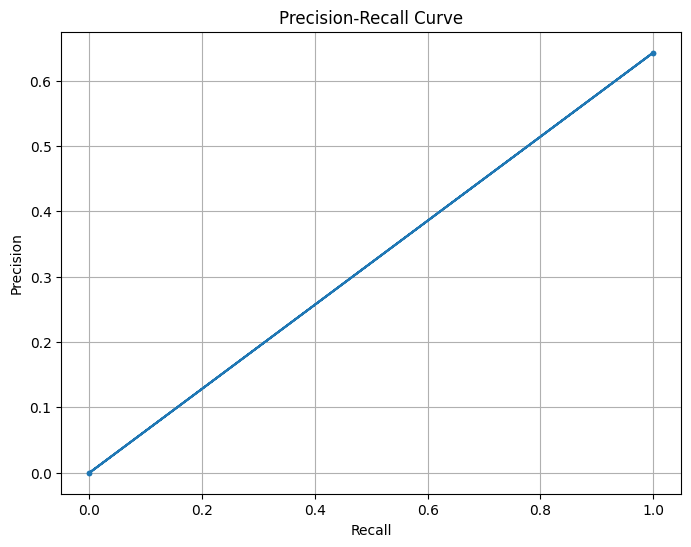

In [38]:

for label in unique_labels:
    true_positives = sum((y_test == label) & (y_test_pred_oner == label))
    predicted_positives = sum(y_test_pred_oner == label)
    actual_positives = sum(y_test == label)

    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0

    if actual_positives > 0:
        recall = true_positives / actual_positives
    else:
        recall = 0

    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [39]:
conf_matrix = calculate_confusion_matrix(y_test, y_test_pred_oner)
print("OneR Confusion Matrix:")
for row in conf_matrix:
    print(row)

OneR Confusion Matrix:
[9, 0]
[5, 0]


# Hyperparameter tuning using validation set for SVM

In [42]:
from sklearn.svm import SVC

best_accuracy = 0
best_c = 0
best_kernel = ''
best_degree = 0

C_values = [0.1, 1, 10, 100]
kernel_values = ['linear', 'rbf', 'poly']
degree_values = [2, 3, 4]

for kernel in kernel_values:
    if kernel == 'poly':
        for degree in degree_values:
            for C in C_values:
                svm_classifier = SVC(C=C, kernel=kernel, degree=degree)
                svm_classifier.fit(X_train_scaled, y_train)
                y_val_pred_svm = svm_classifier.predict(X_val_scaled)
                accuracy = calculate_accuracy(y_val, y_val_pred_svm)
                print(f"Kernel={kernel}, Degree={degree}, C={C}, accuracy={accuracy}")
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_c = C
                    best_kernel = kernel
                    best_degree = degree
    else:
        for C in C_values:
            svm_classifier = SVC(C=C, kernel=kernel)
            svm_classifier.fit(X_train_scaled, y_train)
            y_val_pred_svm = svm_classifier.predict(X_val_scaled)
            accuracy = calculate_accuracy(y_val, y_val_pred_svm)
            print(f"Kernel={kernel}, C={C}, accuracy={accuracy}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_c = C
                best_kernel = kernel

print("Best Kernel for SVM:", best_kernel)
print("Best Degree for SVM:", best_degree) if best_kernel == 'poly' else None
print("Best C for SVM:", best_c)
print("Best validation accuracy for SVM:", best_accuracy)


Kernel=linear, C=0.1, accuracy=0.6923076923076923
Kernel=linear, C=1, accuracy=0.8461538461538461
Kernel=linear, C=10, accuracy=0.8461538461538461
Kernel=linear, C=100, accuracy=0.8461538461538461
Kernel=rbf, C=0.1, accuracy=0.6923076923076923
Kernel=rbf, C=1, accuracy=0.8461538461538461
Kernel=rbf, C=10, accuracy=0.7692307692307693
Kernel=rbf, C=100, accuracy=0.7692307692307693
Kernel=poly, Degree=2, C=0.1, accuracy=0.7692307692307693
Kernel=poly, Degree=2, C=1, accuracy=0.8461538461538461
Kernel=poly, Degree=2, C=10, accuracy=0.7692307692307693
Kernel=poly, Degree=2, C=100, accuracy=0.7692307692307693
Kernel=poly, Degree=3, C=0.1, accuracy=0.9230769230769231
Kernel=poly, Degree=3, C=1, accuracy=0.7692307692307693
Kernel=poly, Degree=3, C=10, accuracy=0.7692307692307693
Kernel=poly, Degree=3, C=100, accuracy=0.7692307692307693
Kernel=poly, Degree=4, C=0.1, accuracy=0.7692307692307693
Kernel=poly, Degree=4, C=1, accuracy=0.7692307692307693
Kernel=poly, Degree=4, C=10, accuracy=0.769230

In [43]:
final_svm_classifier = SVC(C=best_c, kernel=best_kernel, degree=best_degree)
final_svm_classifier.fit(X_train_scaled, y_train)
y_test_pred_svm = final_svm_classifier.predict(X_test_scaled)
test_accuracy_svm = calculate_accuracy(y_test, y_test_pred_svm)
print("SVM Test accuracy : ", test_accuracy_svm)


SVM Test accuracy :  0.9285714285714286


In [44]:
# Initialize empty lists to store Precision, Recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []
unique_labels = set(y_test) | set(y_test_pred_svm)
for label in unique_labels:
    precision = calculate_precision(y_test, y_test_pred_svm, label)
    recall = calculate_recall(y_test, y_test_pred_svm, label)
    f1_score = calculate_f1_score(precision, recall)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
for i, label in enumerate(unique_labels):
    print(f"Class {label}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1-score: {f1_scores[i]}")


Class 0.0:
Precision: 1.0
Recall: 0.8888888888888888
F1-score: 0.9411764705882353
Class 1.0:
Precision: 0.8333333333333334
Recall: 1.0
F1-score: 0.9090909090909091


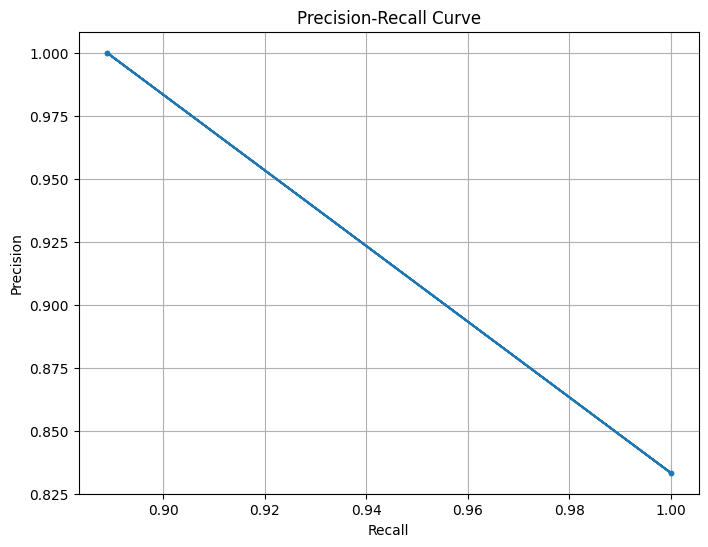

In [45]:

for label in unique_labels:
    true_positives = sum((y_test == label) & (y_test_pred_svm == label))
    predicted_positives = sum(y_test_pred_svm == label)
    actual_positives = sum(y_test == label)

    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0

    if actual_positives > 0:
        recall = true_positives / actual_positives
    else:
        recall = 0

    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [46]:
conf_matrix = calculate_confusion_matrix(y_test, y_test_pred_svm)
print("SVC Confusion Matrix:")
for row in conf_matrix:
    print(row)

SVC Confusion Matrix:
[8, 1]
[0, 5]


# Hyperparameter tuning using validation set for KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

best_accuracy_knn = 0
best_neighbors = 0
best_weights = ''

neighbor_values = [1, 3, 5, 7, 9]
weight_values = ['uniform', 'distance']

for neighbors in neighbor_values:
    for weights in weight_values:
        knn_classifier = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)
        knn_classifier.fit(X_train_scaled, y_train)
        y_val_pred_knn = knn_classifier.predict(X_val_scaled)
        accuracy_knn = calculate_accuracy(y_val, y_val_pred_knn)
        print(f"Neighbors={neighbors}, Weights={weights}, accuracy={accuracy_knn}")

        if accuracy_knn > best_accuracy_knn:
            best_accuracy_knn = accuracy_knn
            best_neighbors = neighbors
            best_weights = weights

print("Best number of neighbors for KNN:", best_neighbors)
print("Best weights for KNN:", best_weights)
print("Best validation accuracy for KNN:", best_accuracy_knn)


Neighbors=1, Weights=uniform, accuracy=0.7692307692307693
Neighbors=1, Weights=distance, accuracy=0.7692307692307693
Neighbors=3, Weights=uniform, accuracy=0.7692307692307693
Neighbors=3, Weights=distance, accuracy=0.7692307692307693
Neighbors=5, Weights=uniform, accuracy=0.7692307692307693
Neighbors=5, Weights=distance, accuracy=0.7692307692307693
Neighbors=7, Weights=uniform, accuracy=0.6923076923076923
Neighbors=7, Weights=distance, accuracy=0.7692307692307693
Neighbors=9, Weights=uniform, accuracy=0.6923076923076923
Neighbors=9, Weights=distance, accuracy=0.7692307692307693
Best number of neighbors for KNN: 1
Best weights for KNN: uniform
Best validation accuracy for KNN: 0.7692307692307693


In [48]:
final_knn_classifier = KNeighborsClassifier(n_neighbors=best_neighbors, weights=best_weights)
final_knn_classifier.fit(X_train_scaled, y_train)
y_test_pred_knn = final_knn_classifier.predict(X_test_scaled)
test_accuracy_knn = calculate_accuracy(y_test, y_test_pred_knn)
print("KNN Test accuracy : ", test_accuracy_knn)


KNN Test accuracy :  0.7857142857142857


In [49]:
# Initialize empty lists to store Precision, Recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []
unique_labels = set(y_test) | set(y_test_pred_knn)
for label in unique_labels:
    precision = calculate_precision(y_test, y_test_pred_knn, label)
    recall = calculate_recall(y_test, y_test_pred_knn, label)
    f1_score = calculate_f1_score(precision, recall)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
for i, label in enumerate(unique_labels):
    print(f"Class {label}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1-score: {f1_scores[i]}")


Class 0.0:
Precision: 0.875
Recall: 0.7777777777777778
F1-score: 0.823529411764706
Class 1.0:
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727272


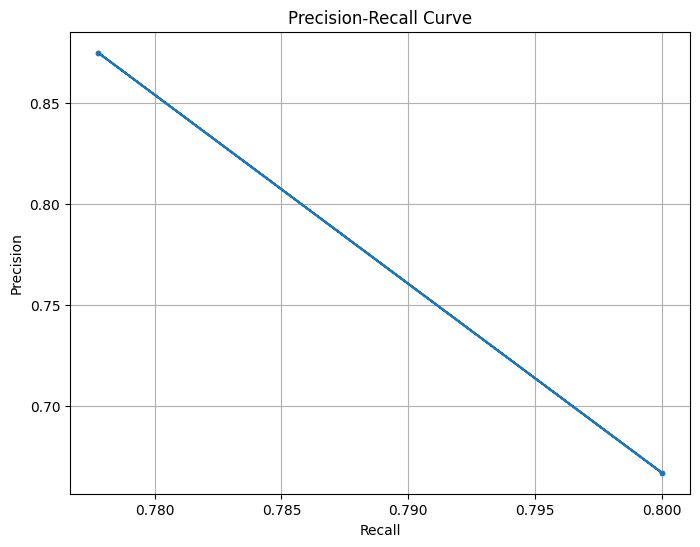

In [50]:

for label in unique_labels:
    true_positives = sum((y_test == label) & (y_test_pred_knn == label))
    predicted_positives = sum(y_test_pred_knn == label)
    actual_positives = sum(y_test == label)

    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0

    if actual_positives > 0:
        recall = true_positives / actual_positives
    else:
        recall = 0

    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [51]:
conf_matrix = calculate_confusion_matrix(y_test, y_test_pred_knn)
print("KNN Confusion Matrix:")
for row in conf_matrix:
    print(row)

KNN Confusion Matrix:
[7, 2]
[1, 4]


# Hyperparameter tuning using validation set for Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

best_accuracy_nb = 0
best_var_smoothing = 0

var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6]

for var_smoothing in var_smoothing_values:
    nb_classifier = GaussianNB(var_smoothing=var_smoothing)
    nb_classifier.fit(X_train_scaled, y_train)
    y_val_pred_nb = nb_classifier.predict(X_val_scaled)
    accuracy_nb = calculate_accuracy(y_val, y_val_pred_nb)
    print(f"Var_smoothing={var_smoothing}, accuracy={accuracy_nb}")

    if accuracy_nb > best_accuracy_nb:
        best_accuracy_nb = accuracy_nb
        best_var_smoothing = var_smoothing

print("Best variance_smoothing for Gaussian Naive Bayes:", best_var_smoothing)
print("Best validation accuracy for Gaussian Naive Bayes:", best_accuracy_nb)


Var_smoothing=1e-09, accuracy=0.7692307692307693
Var_smoothing=1e-08, accuracy=0.7692307692307693
Var_smoothing=1e-07, accuracy=0.7692307692307693
Var_smoothing=1e-06, accuracy=0.7692307692307693
Best variance_smoothing for Gaussian Naive Bayes: 1e-09
Best validation accuracy for Gaussian Naive Bayes: 0.7692307692307693


In [53]:
final_nb_classifier = GaussianNB(var_smoothing=best_var_smoothing)
final_nb_classifier.fit(X_train_scaled, y_train)
y_test_pred_nb = final_nb_classifier.predict(X_test_scaled)
test_accuracy_nb = calculate_accuracy(y_test, y_test_pred_nb)
print("naive Bayes Test accuracy : ", test_accuracy_nb)


naive Bayes Test accuracy :  0.9285714285714286


In [54]:
# Initialize empty lists to store Precision, Recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []
unique_labels = set(y_test) | set(y_test_pred_nb)
for label in unique_labels:
    precision = calculate_precision(y_test, y_test_pred_nb, label)
    recall = calculate_recall(y_test, y_test_pred_nb, label)
    f1_score = calculate_f1_score(precision, recall)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
for i, label in enumerate(unique_labels):
    print(f"Class {label}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1-score: {f1_scores[i]}")


Class 0.0:
Precision: 1.0
Recall: 0.8888888888888888
F1-score: 0.9411764705882353
Class 1.0:
Precision: 0.8333333333333334
Recall: 1.0
F1-score: 0.9090909090909091


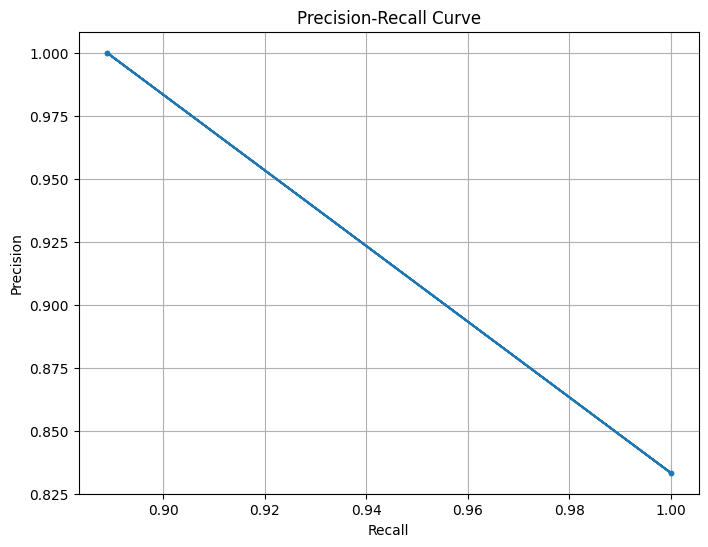

In [55]:

for label in unique_labels:
    true_positives = sum((y_test == label) & (y_test_pred_nb == label))
    predicted_positives = sum(y_test_pred_nb == label)
    actual_positives = sum(y_test == label)

    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0

    if actual_positives > 0:
        recall = true_positives / actual_positives
    else:
        recall = 0

    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [56]:
conf_matrix = calculate_confusion_matrix(y_test, y_test_pred_nb)
print("Decision tree Confusion Matrix:")
for row in conf_matrix:
    print(row)

Decision tree Confusion Matrix:
[8, 1]
[0, 5]


# Export Dataset

In [57]:
file_path = '/content/gdrive/MyDrive/data/Assignment5_processed_dataset_brain_cancer.xlsx'
df.to_excel(file_path, index=False)